# 파이썬을 활용한 공공데이터 분석 (11/21 ~ 11/22)

- - -
## 4. scikit-learn을 활용하여 분류와 예측을 해봅시다

### 1. 머신러닝

- **머신러닝(machine learning)**의 개념은 다양하게 표현할 수 있으나, 일반적으로는 데이터 기반으로 패턴을 학습하고 결과를 예측하는 알고리즘 기법<p>
- **머신러닝 알고리즘**은 데이터를 기반으로 통계적인 신뢰도를 강화하고 예측 오류를 최소화하기 위한 다양한 수학적 기법을 적용해 데이터 내의 패턴을 스스로 인지하고 신뢰도 있는 예측 결과를 도출해 낸다<p>
- **머신러닝의 분류**<p>
    - `지도학습`: 분류, 회귀, 추천, 시각/음성/인지, 텍스트, NLP
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    - `비지도학습`: 클러스터링, 차원 축소, 강화학습
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>

### 2. 사이킷런(scikit-learn)

- **사이킷런(scikit-learn)**은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리<p>
- **사이킷런(scikit-learn)**은 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공한다<p>

#### 1) scikit-learn 예제자료인 붓꽃 데이터를 활용하여 품종을 예측

In [4]:
#[20/11/21|17:49:48]➜  ~/_workspace/20201121_22_openup_python git:(master) pip3 install sklearn
import sklearn

print(sklearn.__version__)

0.23.2


In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()

iris_data = iris.data
iris_target = iris.target

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# 데이터셋 나누기

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_target,
                                                    test_size = 0.2,
                                                    random_state = 1)#random_state 를 주지 않으면, 매번 변경된다.

In [10]:
y_train.shape

(120,)

In [11]:
y_test.shape

(30,)

In [12]:
dt_clf = DecisionTreeClassifier(random_state = 1)#random_state 를 주지 않으면, 매번 변경된다.

dt_clf.fit(X_train, y_train)        # 학습

pred_clf = dt_clf.predict(X_test)   # 예측 또는 분류

In [13]:
from sklearn.metrics import accuracy_score

print('예측 정확도 : {0: 0.4f}'.format(accuracy_score(y_test, pred_clf)))

예측 정확도 :  0.9667


- 붓꽃 데이터를 활용하여 분류를 예측하는 프로세스는 아래와 같다<p>
    1. **데이터 셋 분리** : 데이터를 학습 데이터왕 테스트 데이터로 분리
    2. **모델 학습** : 학습 데이터를 기반으로 머신러닝 알고리즘(위에서는 Decision Tree)을 적용해 모델을 학습
    3. **예측 수행** : 학습된 머신러닝 모델을 이용하요 테스트 데이터의 분류를 예측(붓꽃의 종류를 예측)
    4. **평가** : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 머신러닝 모델 성능을 평가

- scikit-learn의 주요 모듈(module)<p>
    - `sklearn.datasets` : 사이킷런에 내장되어 예제로 제공하는 데이터 셋
    - `sklearn.preprocessing` : 데이터 전처리에 필요한 다양한 가공 기능을 제공(eg. 문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
    - `sklearn.feature_selection` : 알고리즘에 큰 영향을 미치는 피처(feature)를 우선순위대로 선택하는 다양한 기능 제공
    - `sklearn.feature_extraction` : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는 데 사용
    - `sklearn.decomposition` : 차원 축소와 관련한 알고리즘을 지원하는 모듈
    - `sklearn.model_selection` : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출 등에 사용
    - `sklearn.metrics` : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법을 제공
    - `sklearn.ensenble` : 앙상블 알고리즘 제공(랜덤포레스트, 그래디언트 부스팅 등)
    - `sklearn.linear_model` : 주로 선형회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원
    - `sklearn.naive_bayes` : 나이브 베이즈 알고리즘 제공
    - `sklearn.svm` : 서포트 벡터 머신 알고리즘을 제공
    - `sklearn.tree` : 의사 결정 트리 알고리즘 제공
    - `sklearn.cluster` : 비지도 클러스터링 알고리즘 제공
    - `sklearn.pipeline` : 피처 처리 등의 변환과 머신러닝 알고리즘 학습 $\cdot$ 예측 등을 함께 묶어서 실행할 수 있는 유틸리티를 제공

- - -
#### 2) Model Selection 방법

- 훈련용/테스트용 데이터 셋 분리
    - **train_test_split()**

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import numpy  as np

iris = load_iris()

features = iris.data
label = iris.target

clf_dt = DecisionTreeClassifier(random_state = 1)

kfold = KFold(n_splits = 5)

cv_acc = []

- **교차검증(cross validation)**<p>
    - K-Fold

In [16]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n{0} 교차검증 정확도 : {1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('\n{0} 검증 데이터 셋 인덱스:{1}'.format(n_iter, test_index))
    
    cv_acc.append(accuracy)

print('\n# 평균 검증 정확도 :', np.mean(cv_acc))


1 교차검증 정확도 : 1.0, 학습데이터 크기: 120, 검증데이터 크기: 30

1 검증 데이터 셋 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차검증 정확도 : 1.0, 학습데이터 크기: 120, 검증데이터 크기: 30

2 검증 데이터 셋 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차검증 정확도 : 0.9, 학습데이터 크기: 120, 검증데이터 크기: 30

3 검증 데이터 셋 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차검증 정확도 : 0.9333, 학습데이터 크기: 120, 검증데이터 크기: 30

4 검증 데이터 셋 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차검증 정확도 : 0.7333, 학습데이터 크기: 120, 검증데이터 크기: 30

5 검증 데이터 셋 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

# 평균 검증 정확도 : 0.9133199999999999


In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import pandas as pd
import numpy  as np

iris = load_iris()

features = iris.data
label = iris.target

clf_dt = DecisionTreeClassifier(random_state = 1)

scores = cross_val_score(clf_dt, features, label, scoring = 'accuracy', cv = 5)

print('교차 검증별 정확도 :', scores)
print('\n 평균 검증 정확도 :', np.mean(scores))

교차 검증별 정확도 : [0.96666667 0.96666667 0.9        1.         1.        ]

 평균 검증 정확도 : 0.9666666666666668


- - -
#### 3) 데이터 전처리(preprocessing)

- 레이블 인코딩(label encoding)

In [27]:
from sklearn.preprocessing import LabelEncoder

item = ['컴퓨터', '노트북', '마우스', '키보드', '프린터', '노트북', '마우스', '모니터']

encoding = LabelEncoder()
encoding.fit(item)
labels = encoding.transform(item)

print('인코딩 변환돈 값:', labels)
print('\n인코딩 클래스:', encoding.classes_)
print('\n디코딩 원본:', encoding.inverse_transform([2,1,1,0,3,2]))



인코딩 변환돈 값: [3 0 1 4 5 0 1 2]

인코딩 클래스: ['노트북' '마우스' '모니터' '컴퓨터' '키보드' '프린터']

디코딩 원본: ['모니터' '마우스' '마우스' '노트북' '컴퓨터' '모니터']


- 원-핫 인코딩(one-hot encoding)

In [30]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

item = ['컴퓨터', '노트북', '마우스', '키보드', '프린터', '노트북', '마우스', '모니터']

item = np.array(item)
item = item.reshape(-1,1)
encoder = OneHotEncoder()
encoder.fit(item)
labels = encoder.transform(item)

# print('원-핫 인코딩 변환된 값:\n', labels)
print('원-핫 인코딩 변환된 값:\n', labels.toarray())


원-핫 인코딩 변환된 값:
 [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


- 스케일링(standard scaler)

In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()

iris_data = iris.data
iris_target = iris.target

iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df_print = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df_print['label'] = iris_target
iris_df_print

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- StandardScaler : 평균이 0인 표준 편차가 1인 것

In [44]:
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns = iris.feature_names)
iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [45]:
iris_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


- 정규화(min-max scaler) : 최소 0, 최대 1 구간을 만듬. ex. 로지스틱 회귀분석에 사용, RNN 의 경우 LSTM 에서 min -1 / max 1 range 사용하는데 이유는 tanh

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler_min = MinMaxScaler()
scaler_min.fit(iris_df)
iris_scaled_min = scaler_min.transform(iris_df)

iris_scaled_min_df = pd.DataFrame(iris_scaled_min, columns = iris.feature_names)
iris_scaled_min_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [47]:
iris_scaled_min_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항. 

In [52]:
from sklearn.preprocessing import MinMaxScaler

train_array = np.arange(0, 11).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_array)
scaled_train_array = scaler.transform(train_array)


print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(scaled_train_array.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- 위와 같은 문제가 발생해서 모델을 만들 때 영향을 미칠 수 있으므로 반드시 fit()을 호출하지 않고 transform()만으로 변환을 해주어야 한다

In [54]:
test_array = np.arange(0, 6).reshape(-1,1)
scaler.fit(test_array)
test_scaled_array = scaler.transform(test_array)

print('원본 train_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(test_scaled_array.reshape(-1), 2))

원본 train_array 데이터: [0 1 2 3 4 5]
Scale된 train_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [56]:

#아래를 사용해서 scaler.fit(train_array) 수행을 덮어쓰면 안된다.
#scaler.fit(test_array)
scaler.fit(train_array)#위 cell에서 덮어썼기에 다시 해준 것임!

test_scaled_array = scaler.transform(test_array)

print('원본 train_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(test_scaled_array.reshape(-1), 2))

원본 train_array 데이터: [0 1 2 3 4 5]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- - -
### 3. 타이타닉 생존자를 예측해 봅시다

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#[20/11/22|14:42:25]➜  ~/_workspace/20201121_22_openup_python git:(master) pip3 install seaborn
import seaborn as sns

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
#NaN 값을 보정 : data 작기에 보정해서 활용하자!
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [64]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
              ... 
B80              1
D30              1
E34              1
D48              1
C118             1
Name: Cabin, Length: 148, dtype: int64

In [65]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [66]:
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [67]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [68]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

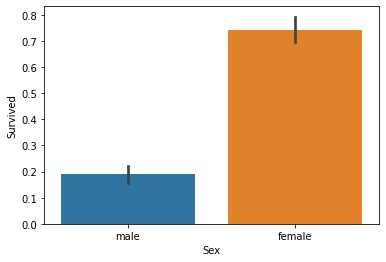

In [71]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

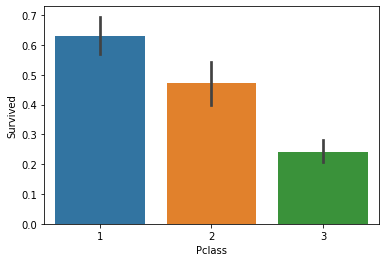

In [72]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

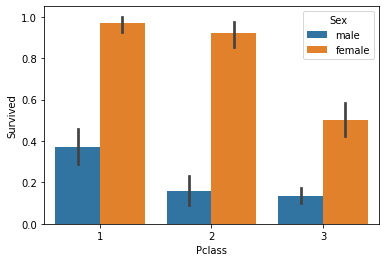

In [73]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

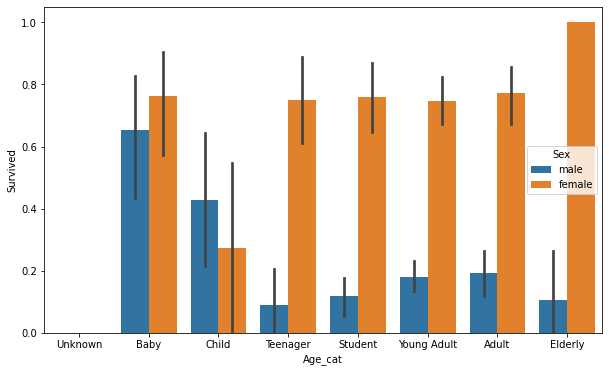

In [74]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

plt.rcParams['figure.figsize'] = [10, 6]

sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)

In [75]:
from sklearn.preprocessing import LabelEncoder

#영문은 분석을 할 수 없기에 숫자로 변경하는 과정을 거친다.
def encoder_feature(data):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
    return data

titanic_df = encoder_feature(titanic_df)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,Young Adult


In [90]:
from sklearn.preprocessing import LabelEncoder

def fill_na(data):
    data['Age'].fillna(data['Age'].mean(), inplace = True)
    data['Cabin'].fillna('N', inplace = True)
    data['Embarked'].fillna('N', inplace = True)
    return data

def drop_features(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return data

def encoder_feature(data):
    data['Cabin'] = data['Cabin'].str[:1]
    data['Embarked'] = data['Embarked'].str[:1]
    
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
    return data

def preprocessing_feature(data):
    data = fill_na(data)
    data = drop_features(data)
    data = encoder_feature(data)
    return data
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('titanic_train.csv')

titanic_df_pre = preprocessing_feature(titanic_df)
titanic_df_pre

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [91]:
titanic_df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [95]:
y_df = titanic_df_pre['Survived']
X_df = titanic_df_pre.drop(['Survived'], axis = 1)

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 1)

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)

X_train.shape (712, 8)
X_test.shape (179, 8)
y_train.shape (712,)
y_test.shape (179,)


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 1)
rf_clf = RandomForestClassifier(random_state = 1)
lr_clf = LogisticRegression(random_state = 1)

# decision tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree의 정확도는 : {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

# randomforest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('randomforest의 정확도는 : {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

# logistic regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('logistic regression의 정확도는 : {0: .4f}'.format(accuracy_score(y_test, lr_pred)))

Decision Tree의 정확도는 :  0.7374
randomforest의 정확도는 :  0.7654
logistic regression의 정확도는 :  0.7989


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- - -
### 2. Accuracy, Confusion Matrix, Precision, Recall, F1 Score, ROC Cuve, AUC 평가지표를 알아봅시다


#### 1) Confusion Matrix

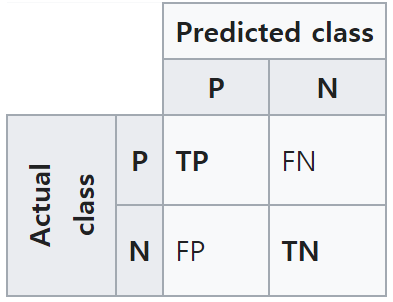

- Recall, True Positive Rate(TPR)<p>
    <br>
    $$TPR=\frac{TP}{P}=\frac{TP}{TP+FN}$$
    <br>
- Precision, Positive Predictive Value(PPV)<p>
    <br>
    $$PPV=\frac{TP}{TP+FP}$$
    <br>
- Accuracy<p>
    <br>
    $$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$
    <br>
- F1 Score<p>
    <br>
    $$F_{1}=2 \times  \frac{PPV \times TPR}{PPV+TPR}$$

#### 2) Accuracy

- target의 불균형

#### 3) Precision, Recall

#### 4) F1 Score

#### 5) ROC Curve and AUC

#### 6) 타이타닉 데이터 셋에 적용해보자

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


오차 행렬

[[104  14]
 [ 13  48]]

정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805, AUC:0.8341


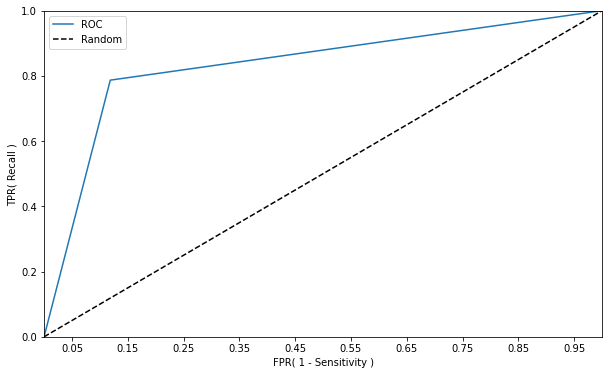

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    df['Embarked'] = df['Embarked'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


def roc_curve_plot(y_test , pred):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print()
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()#다른 모델로 바꾸어서 서로 비교하는 것이다!

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test , pred)
roc_curve_plot(y_test , pred)

#### 7) 실습과제 : 타이타닉 데이터 셋에 다른 모델을 적용하여 성능을 높여 보자!

오차 행렬

[[106  12]
 [ 14  47]]

정확도: 0.8547, 정밀도: 0.7966, 재현율: 0.7705, F1: 0.7833, AUC:0.8344


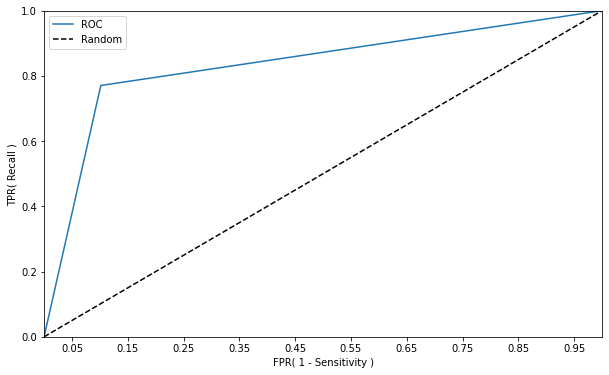

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    df['Embarked'] = df['Embarked'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


def roc_curve_plot(y_test , pred):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print()
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import RidgeClassifier

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = RidgeClassifier()#다른 모델로 바꾸어서 서로 비교하는 것이다!

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test , pred)
roc_curve_plot(y_test , pred)

## 5. LSTM을 활용하여 예측을 해봅시다